# Brazil Covid-19 Data Analysis

#### Author: Romullo Ferreira

The aim of this project is to analyze Covid-19 (Brazil) data, which includes the following steps:

1. Defining the list of questions to be answered with data analysis.
2. Data wrangling 
    - 2.1. Gather
    - 2.2. Assess
    - 2.3. Clean
3. Data exploration and effective communication of the exploratory steps.
4. Conclusions.

Useful facts about the data:
- epidemiological situation of COVID-19 in Brazil
- The data update process is carried out daily by the Ministry of Health through official information provided by the State Health Secretariats of the 27 Brazilian Federative Units
- 27 states of Brazil
- 5 regions of brazil (Central-West, North, Northeast, South and Southeast)
- Last data collection date: 2021-03-19
- Data Source: State Health Secretariats. Brazil, 2020
- Detailed data can be downloaded from [OpenDataSUS](https://opendatasus.saude.gov.br/)
- You can also access the [Brazilian Open Data Portal](https://dados.gov.br/dataset) to find more coronavirus data

## 1. Defining the list of questions to be answered with data analysis

We have a lot of things to ask. The dataset has a lot of information, but for the analysis not to be too long I decided to ask some questions that I thought were important as a start. But after taking a look at my analysis feel free to ask other questions and analyze.

It is important to remember that All questions below refer to Covid-19 data from Brazil:

- a. - What is the total accumulated cases?
- b. - What is the total new cases?
- c. - What is the total recovered cases?
- d. - What is the total followup cases?
- e. - What is the total Covid-19 deaths?
- f. - What is the total new deaths?
- g. - What is the Incidence Coefficient of Covid-19?
- h. - What is the Mortality Coefficient for Covid-19?
- i. - What is the Covid-19 Lethality Rate?
- j. - Which region(zone) has the highest Covid-19 Cases?
- k. - Which states have the highest number of covid cases?
- l. - Which cities have the highest number of covid cases?
- m. - Which region(zone) has the highest Covid-19 deaths?
- n. - Which states have the highest number of covid deaths?
- o. - Which cities have the highest number of covid deaths?

## 2. Data wrangling

## 2.1. Gather

Firstly, let's import all the libraries necessary for this project

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import CSV File

In [3]:
df_covid19br = pd.read_csv('COVIDBR.csv', sep=';')

## 2.2. Assess

Let's take a look at the dataframe

In [4]:
df_covid19br.sample(5)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
91318,Norte,PA,Mocajuba,15,150460.0,15011.0,TOCANTINS,2020-11-14,46,31136.0,1415,0,24,0,NaN,NaN,0.0
1173489,Sudeste,RJ,Porciúncula,33,330410.0,33007.0,NOROESTE,2020-09-12,37,18847.0,597,0,15,0,NaN,NaN,0.0
376044,Nordeste,CE,Nova Russas,23,230930.0,23015.0,15ª REGIAO CRATEUS,2021-03-10,10,32328.0,1166,14,23,0,NaN,NaN,0.0
1437070,Sul,PR,Campina do Simão,41,410395.0,41005.0,5ª RS GUARAPUAVA,2020-12-14,51,3887.0,14,0,1,0,NaN,NaN,0.0
1451000,Sul,PR,Curitiba,41,410690.0,41002.0,2ª RS METROPOLITANA,2020-11-12,46,1933105.0,41234,91,1545,29,NaN,NaN,1.0


We can already see that there are missing values in the columns estado, municipio, codmun and other columns for example.

Here we can see the size of original dataset, 2.012.472 rows e 17 columns.

In [5]:
df_covid19br.shape

(2012472, 17)

Let's count the unique values

In [6]:
df_covid19br.nunique()

regiao                        6
estado                       27
municipio                  5297
coduf                        28
codmun                     5591
codRegiaoSaude              450
nomeRegiaoSaude             440
data                        389
semanaEpi                    53
populacaoTCU2019           5104
casosAcumulado            33078
casosNovos                 3779
obitosAcumulado            7273
obitosNovos                 641
Recuperadosnovos            336
emAcompanhamentoNovos       336
interior/metropolitana        2
dtype: int64

##### Let's create a copy of the original dataframe. And create another dataframe (filtered_df), only data on date 2021-03-19, which is where I'm going to focus my analysis.

In [7]:
filtered_df = df_covid19br.copy()
filtered_df = filtered_df.query("data > '2021-03-18'")
filtered_df.sample(3)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
792407,Nordeste,BA,Santa Maria da Vitória,29,292810.0,29021.0,SANTA MARIA DA VITORIA,2021-03-19,11,39845.0,1069,12,19,2,NaN,NaN,0.0
1486211,Sul,PR,Luiziana,41,411373.0,41011.0,11ª RS CAMPO MOURAO,2021-03-19,11,7262.0,275,2,3,0,NaN,NaN,0.0
706487,Nordeste,BA,Conceição do Jacuípe,29,290850.0,29006.0,FEIRA DE SANTANA,2021-03-19,11,33153.0,1948,6,16,1,NaN,NaN,0.0


Dimensions of the dataframe. Here we can already see that our filtered dataframe is much smaller than the original file, with 5619 rows and 17 columns. 

In [8]:
filtered_df.shape

(5619, 17)

- Which columns have missing values? 
- Here we can already see that the "munincipio" column has only 5570 against 5619 of the original file. This means that we have 49 missing values. And the "codmun" column has only 5591 out of a total of 5619, this means that we have 28 missing values. Let's keep that information.

In [9]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 390 to 2012471
Data columns (total 17 columns):
regiao                    5619 non-null object
estado                    5618 non-null object
municipio                 5570 non-null object
coduf                     5619 non-null int64
codmun                    5591 non-null float64
codRegiaoSaude            5570 non-null float64
nomeRegiaoSaude           5570 non-null object
data                      5619 non-null object
semanaEpi                 5619 non-null int64
populacaoTCU2019          5598 non-null float64
casosAcumulado            5619 non-null int64
casosNovos                5619 non-null int64
obitosAcumulado           5619 non-null int64
obitosNovos               5619 non-null int64
Recuperadosnovos          1 non-null float64
emAcompanhamentoNovos     1 non-null float64
interior/metropolitana    5570 non-null float64
dtypes: float64(6), int64(6), object(5)
memory usage: 790.2+ KB


Another way to see missing values. Count of missing values.

In [10]:
filtered_df.isnull().sum()

regiao                       0
estado                       1
municipio                   49
coduf                        0
codmun                      28
codRegiaoSaude              49
nomeRegiaoSaude             49
data                         0
semanaEpi                    0
populacaoTCU2019            21
casosAcumulado               0
casosNovos                   0
obitosAcumulado              0
obitosNovos                  0
Recuperadosnovos          5618
emAcompanhamentoNovos     5618
interior/metropolitana      49
dtype: int64

## 2.3. Clean

Make copy of the filtered_df dataframe to clean

In [11]:
df_clean = filtered_df.copy()

### #Delete columns 

* The columns 'coduf ', ' codRegiaoSaude ', ' nomeRegiaoSaude ', 'populacaoTCU2019',  'semanaEpi ' and ' interior / metropolitana ' are not required, because I will not use it in my analysis until now.

#### Define

* We will delete the columns 'coduf ', ' codRegiaoSaude ', ' nomeRegiaoSaude ', 'PopilacaoTCU2019', semanaEpi ' and ' interior / metropolitana ' 

#### Code

In [12]:
colunas = ['coduf', 'codRegiaoSaude', 'nomeRegiaoSaude', 'populacaoTCU2019', 'semanaEpi', 'interior/metropolitana']
df_clean.drop(columns = colunas, inplace = True)

#### Test

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 390 to 2012471
Data columns (total 11 columns):
regiao                   5619 non-null object
estado                   5618 non-null object
municipio                5570 non-null object
codmun                   5591 non-null float64
data                     5619 non-null object
casosAcumulado           5619 non-null int64
casosNovos               5619 non-null int64
obitosAcumulado          5619 non-null int64
obitosNovos              5619 non-null int64
Recuperadosnovos         1 non-null float64
emAcompanhamentoNovos    1 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 526.8+ KB


In [14]:
df_clean.sample(3)

,regiao,estado,municipio,codmun,data,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
1254943,Sudeste,SP,Gastão Vidigal,351680.0,2021-03-19,108,0,12,0,NaN,NaN
343475,Nordeste,CE,Camocim,230260.0,2021-03-19,3277,49,97,0,NaN,NaN
673551,Nordeste,BA,Amélia Rodrigues,290110.0,2021-03-19,1473,31,29,2,NaN,NaN


In [15]:
df_clean.shape

(5619, 11)

### #Rename columns

* I decided to rename the columns to be better for everyone who is going to analyze this file, and improve visualization.

#### Define

* Let's rename the columns

#### Code

In [16]:
renamecolumns = {'regiao':'region', 'estado': 'state', 'municipio' : 'city', 'codmun': 'codcity', 'data': 'date', 'casosAcumulado': 'totalInfected', 'casosNovos': 'newInfected', 'obitosAcumulado': 'totalDeaths', 'obitosNovos': 'newdeaths', 'Recuperadosnovos': 'recovered', 'emAcompanhamentoNovos': 'followUp'}
df_clean = df_clean.rename(columns = renamecolumns)

#### Test

In [17]:
df_clean.sample(3)

,region,state,city,codcity,date,totalInfected,newInfected,totalDeaths,newdeaths,recovered,followUp
395385,Nordeste,CE,Ubajara,231360.0,2021-03-19,1392,9,31,0,NaN,NaN
1408883,Sudeste,SP,Ubatuba,355540.0,2021-03-19,4436,10,78,0,NaN,NaN
1113891,Sudeste,MG,Uberlândia,317020.0,2021-03-19,76003,845,1472,19,NaN,NaN


### #Missing values (Fixing NaN data values)

* There are missing values from cities that have no name, let's disregard these values. 

#### Define

* Let's exclude these cities from the analysis, because we have no way of knowing which names

* In our project the "city" column is essential for our analysis, so lines that have this missing data must be excluded, so let's clean up the lines without cities. For this we will use the "codcity" column.

#### Code

In [18]:
#Filter only not null lines (NaN)
df_clean_notnull = df_clean.dropna(subset=['codcity'])

#### Test

In [19]:
df_clean_notnull.shape

(5591, 11)

In [20]:
df_clean_notnull.count()

region           5591
state            5591
city             5570
codcity          5591
date             5591
totalInfected    5591
newInfected      5591
totalDeaths      5591
newdeaths        5591
recovered           0
followUp            0
dtype: int64

### #Duplicated Data

##### Another important information is that in Brazil we have some cities with the same names but in different states.

Is there really duplicate data? Cities with the same names but different states.

For this reason, we will not use the column 'city' (the name of the city) in our analysis. So let's use codmun to make our analysis more useful. And that is also why we are not going to delete this duplicate data.

Let's take a look at the analysis of duplicate data below to understand the problem.

##### Total number of cities

In [21]:
df_clean_notnull['city'].count()

5570

##### Counting the unique values for the "city" column

In [22]:
df_clean_notnull['city'].nunique()

5297

##### Counting the occurrence of the value of cities

In [23]:
df_clean_notnull['city'].value_counts().sort_values(ascending=False).head(10)

São Domingos       5
Bom Jesus          5
Santa Helena       4
Santa Luzia        4
São Francisco      4
Planalto           4
Vera Cruz          4
Santa Terezinha    4
Santa Inês         4
Bonito             4
Name: city, dtype: int64

##### List of times that the city Bom Jesus appears

For example, the city Bom Jesus appears 5 times in the dataset but each city has a different state. Because they are really different cities in the country.

In [24]:
df_clean_notnull[df_clean_notnull['city'] == 'Bom Jesus'].head(5)

,region,state,city,codcity,date,totalInfected,newInfected,totalDeaths,newdeaths,recovered,followUp
262567,Nordeste,PI,Bom Jesus,220190.0,2021-03-19,2338,5,27,0,NaN,NaN
405051,Nordeste,RN,Bom Jesus,240170.0,2021-03-19,516,-4,10,0,NaN,NaN
469849,Nordeste,PB,Bom Jesus,250220.0,2021-03-19,96,1,3,0,NaN,NaN
1575353,Sul,SC,Bom Jesus,420253.0,2021-03-19,297,1,4,0,NaN,NaN
1684185,Sul,RS,Bom Jesus,430230.0,2021-03-19,490,0,12,0,NaN,NaN


##### Total cities with duplicate names

In [25]:
sum(df_clean_notnull.duplicated(subset='city', keep='first'))

293

### 3. Data exploration and communication

##### a. - What is the total cumulative cases?

Total cumulative cases on 2021-03-19

Total number of people infected with coronavirus in Brazil on 2021-03-19

In [26]:
totalInfected = df_clean_notnull['totalInfected'].sum() 
print(totalInfected)

11871390


##### b. - What is the total new cases?

New cases on 2021-03-19

Total number of people infected with coronavirus in Brazil in the last 24 hours

In [27]:
newInfected = df_clean_notnull['newInfected'].sum() 
print(newInfected)

90570


##### c. - What is the total recovered cases?

Total Recovered

According to the World Health Organization, for cases of COVID-19 confirmed by laboratory criteria, those who had two negative results for SARS-CoV-2 at least 1 day apart are considered as recovered. For mild cases, the WHO estimates that the time between the onset of infection and recovery will last up to 14 days.

In Brazil, the number of recovered people is estimated by a composite calculation that takes into account the records of cases and deaths confirmed by COVID-19, reported by the State Health Departments, and the number of hospitalized patients registered in the Epidemiological Surveillance System of the Flu (SIVEP Flu).

In [28]:
recovered = df_clean['recovered'].sum() 
print(recovered)

10383460.0


##### d. - What is the total followup cases?

All cases notified in the last 14 days by the State Health Departments and that did not lead to death are considered as “follow-up”. And among the cases that presented with Severe Acute Respiratory Syndrome and were hospitalized, all those who were hospitalized in the last 14 days and who were not recovered or died were considered to be "under monitoring".

In [29]:
followUp = df_clean['followUp'].sum() 
print(followUp)

1197616.0


##### e. - What is the total Covid-19 deaths?

In [30]:
totalDeaths = df_clean_notnull['totalDeaths'].sum()
print(totalDeaths)

290314


##### f. - What is the total new deaths?

Total new deaths on 2021-03-19 (last 24 hours).

In [31]:
newDeaths = df_clean_notnull['newdeaths'].sum() 
print(newDeaths)

2815


##### Population

The total data of the population of Brazil is available at [datasus.saude.gov/populacao-residente](https://datasus.saude.gov.br/populacao-residente/) or you can also find it on the [IBGE website](https://www.ibge.gov.br/). I will use the value 210.147.125 as the total population of Brazil in the following analyzes.

In [32]:
populationBrazil = 210147125

##### g. - What is the Incidence Coefficient of Covid-19?

Incidence Coefficient 

Total infected per 100.000 inhabitants

In [33]:
incidenceCoefficient =  (totalInfected* 100000)/ populationBrazil
print(incidenceCoefficient)

5649.085134997683


##### h. - What is the Mortality Coefficient for Covid-19?

Mortality Rate

Total deaths by covid, per 100.000 inhabitants, in the population residing in a geographic space, in the year considered.

In [34]:
mortalityRate = (totalDeaths * 100000) / populationBrazil
print(mortalityRate)

138.14797609056038


##### i. - What is the Covid-19 Lethality Rate?

Lethality Rate 

Total deaths by covid-19 in the population residing in a geographic space.

In [35]:
lethalityRate =  (totalDeaths * 100)/ totalInfected
print(lethalityRate)

2.445492903526883


##### j. - Which region(zone) has the highest Covid-19 Cases?

Bar graph - regions with most coronavirus cases

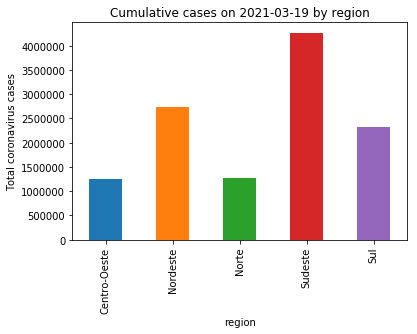

In [36]:
df_clean_notnull.groupby(["region"]).sum()["totalInfected"].plot(kind="bar", title="Cumulative cases on 2021-03-19 by region")
plt.ylabel('Total coronavirus cases');

In [37]:
regionMostCases = df_clean_notnull.groupby('region')['totalInfected'].sum().sort_values(ascending=False)
regionMostCases.head(5)

region
Sudeste         4267653
Nordeste        2741080
Sul             2326878
Norte           1277936
Centro-Oeste    1257843
Name: totalInfected, dtype: int64

##### k. - Which states have the highest number of covid cases?

Bar graph - states with most coronavirus cases

Text(0.5,0,'Total coronavirus cases')

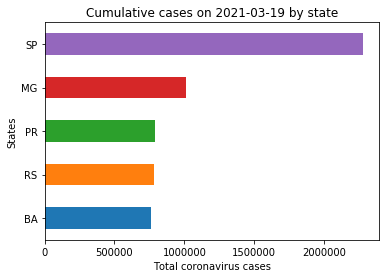

In [38]:
plotinfectedstate = df_clean_notnull.groupby('state')['totalInfected'].sum().sort_values().tail(5)
plotinfectedstate.plot(kind='barh')
plt.title("Cumulative cases on 2021-03-19 by state")
plt.ylabel("States")
plt.xlabel("Total coronavirus cases")

In [39]:
statesMostCases = df_clean_notnull.groupby('state')['totalInfected'].sum().sort_values(ascending=False)
statesMostCases.head(5)

state
SP    2280033
MG    1014079
PR     789685
RS     780186
BA     762616
Name: totalInfected, dtype: int64

##### l. - Which cities have the highest number of covid cases?

Bar graph - cities with most coronavirus cases

Text(0.5,0,'Total coronavirus cases')

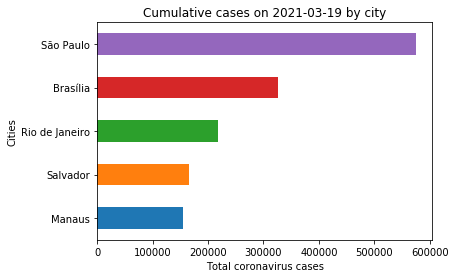

In [40]:
plotinfectedcity = df_clean_notnull.groupby('city')['totalInfected'].sum().sort_values().tail(5)
plotinfectedcity.plot(kind='barh')
plt.title("Cumulative cases on 2021-03-19 by city")
plt.ylabel("Cities")
plt.xlabel("Total coronavirus cases")

In [41]:
citiesMostCases = df_clean_notnull.groupby('city')['totalInfected'].sum().sort_values(ascending=False)
citiesMostCases.head(5)

city
São Paulo         575331
Brasília          326083
Rio de Janeiro    217222
Salvador          165794
Manaus            155382
Name: totalInfected, dtype: int64

##### m. - Which region(zone) has the highest Covid-19 deaths?

Bar graph - region(zone) with most coronavirus deaths

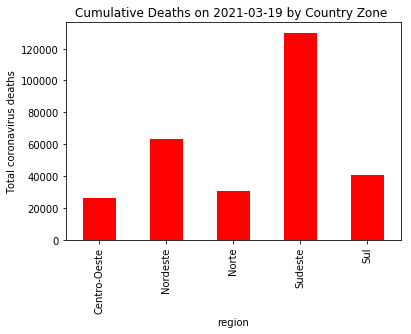

In [42]:
df_clean_notnull.groupby(["region"]).sum()["totalDeaths"].plot(kind="bar", color='red', title="Cumulative Deaths on 2021-03-19 by Country Zone ")
plt.ylabel('Total coronavirus deaths');

In [43]:
regionMostDeaths = df_clean_notnull.groupby('region')['totalDeaths'].sum().sort_values(ascending=False)
regionMostDeaths.head(5)

region
Sudeste         130050
Nordeste         63408
Sul              40546
Norte            30447
Centro-Oeste     25863
Name: totalDeaths, dtype: int64

##### n. - Which states have the highest number of covid deaths?

Bar graph - states with most coronavirus deaths

Text(0.5,0,'Total coronavirus deaths')

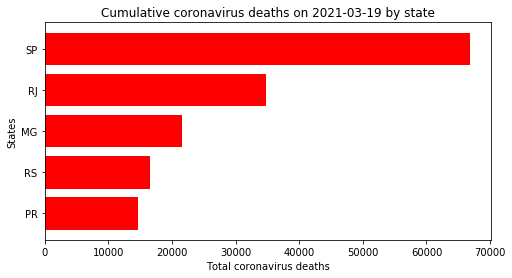

In [44]:
plotstatedeaths = df_clean_notnull.groupby('state')['totalDeaths'].sum().sort_values().tail(5)
plotstatedeaths.plot(kind='barh', figsize=(8, 4), color='red', zorder=2, width=0.8, title="Total coronavirus death by state")
plt.title("Cumulative coronavirus deaths on 2021-03-19 by state")
plt.ylabel("States")
plt.xlabel("Total coronavirus deaths")

##### State São Paulo leads with 66.798 total deaths, followed by Rio de Janeiro with approximately half the value of the state of São Paulo (34.830), and Minas Gerais with 21.540.

In [45]:
statesMostDeaths = df_clean_notnull.groupby('state')['totalDeaths'].sum().sort_values(ascending=False)
statesMostDeaths.head(10)

state
SP    66798
RJ    34830
MG    21540
RS    16507
PR    14658
BA    13885
CE    12750
AM    11743
PE    11614
GO    10190
Name: totalDeaths, dtype: int64

##### o. - Which cities have the highest number of covid deaths?

Bar graph - cities with most coronavirus deaths

Text(0.5,0,'Total coronavirus deaths')

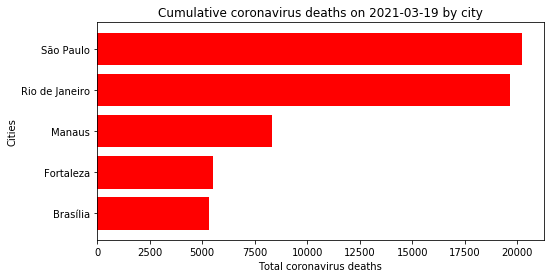

In [46]:
plotcitydeaths = df_clean_notnull.groupby('city')['totalDeaths'].sum().sort_values().tail(5)
plotcitydeaths.plot(kind='barh', figsize=(8, 4), color='red', zorder=2, width=0.8, title="Total coronavirus death by city")
plt.title("Cumulative coronavirus deaths on 2021-03-19 by city")
plt.ylabel("Cities")
plt.xlabel("Total coronavirus deaths")

##### City São Paulo leads in the total of deaths, followed by the city Rio de Janeiro, and Manaus with approximately half of the value of São Paulo.

In [47]:
citiesMostDeaths = df_clean_notnull.groupby('city')['totalDeaths'].sum().sort_values(ascending=False)
citiesMostDeaths.head(10)

city
São Paulo         20236
Rio de Janeiro    19660
Manaus             8298
Fortaleza          5491
Brasília           5321
Salvador           4472
Recife             3233
Goiânia            3193
Belém              3160
Porto Alegre       3024
Name: totalDeaths, dtype: int64

### 4. Conclusions

About this project, we examined data from covid-19 in Brazil to understand how the disease is in the country, the number of deaths by region.

Some useful insights have been found:

- Total coronavirus (COVID-19) cases in Brazil on 2021-03-19: 11.871.390
- Total recovered: 10.383.460
- Total cumulative deaths in Brazil on 2021-03-19: 290.314
- Total new deaths in the last 24 hours in Brazil: 2.815
- The region with the highest number of cases: Sudeste with 4.267.653 cases. 
- The region with the highest number of deaths: Sudeste with 130.050 deaths.
- The state with the highest number of cases: SP (São Paulo) with 2.280.033 cases.
- The state with the highest number of deaths: SP (São Paulo) with 66.798 deaths.
- The city with the highest number of cases: São Paulo with 575.331 cases.
- The city with the highest number of deaths: São Paulo with 20.236 deaths.

With these conclusions we can make decisions. With these decisions, we can take actions to try to solve the problem, or reduce the negative effects. We can know which region or state to prioritize, to reduce deaths.

In this project, none of our questions really involve machine learning or predictive models of any kind. In our analysis we used python and powerful libraries like pandas, they were enough to verify a lot of information about the collected data. In another future project, we can go deeper into our analysis. And discover more useful information that can help the government make better decisions to help more people.